In [2]:
import matplotlib.patches as mpatches  # For creating legend handles
from matplotlib.colors import ListedColormap
import saber.visualization as vis
import matplotlib.pyplot as plt
import zarr, json, os
import numpy as np

In [ ]:
# Raw Data:
# zfile = '24jul29c_training_data.zarr'

# Annotations:
zfile = 'test.zarr'

zroot = zarr.open(zfile, mode='r')
print('Available Runs: ', list(zroot.keys()))
print('Best Runs: ', zroot.attrs['good_run_ids'])

In [101]:
# Parse the JSON string into a Python dictionary
class_dict = json.loads(zroot.attrs['class_dict'])

# Get all the class names (keys of the dictionary)
class_names = list(class_dict.keys())
print('Class Names: ', class_names)

# Define unique colors for each class (RGBA values)
colors = [
    (1, 0, 0, 0.5),  # Red with transparency
    (0, 1, 0, 0.5),  # Green with transparency
    (0, 0, 1, 0.5),  # Blue with transparency
    (1, 1, 0, 0.5),  # Yellow with transparency
    (0.5, 0, 0.5, 0.5),  # Purple with transparency
    (1, 0.5, 0, 0.5),  # Orange with transparency
    (0, 1, 1, 0.5),  # Cyan with transparency
    (1, 0, 1, 0.5),  # Magenta with transparency
]

if len(class_names) > len(colors):
    raise ValueError("Not enough colors defined for the number of classes.")

# Create a dictionary mapping class names to colors
class_colors = {class_names[i]: colors[i] for i in range(len(class_names))}

Class Names:  ['lys', 'carbon', 'mito']


Displaying mask 0 for class: lys
Displaying mask 1 for class: carbon


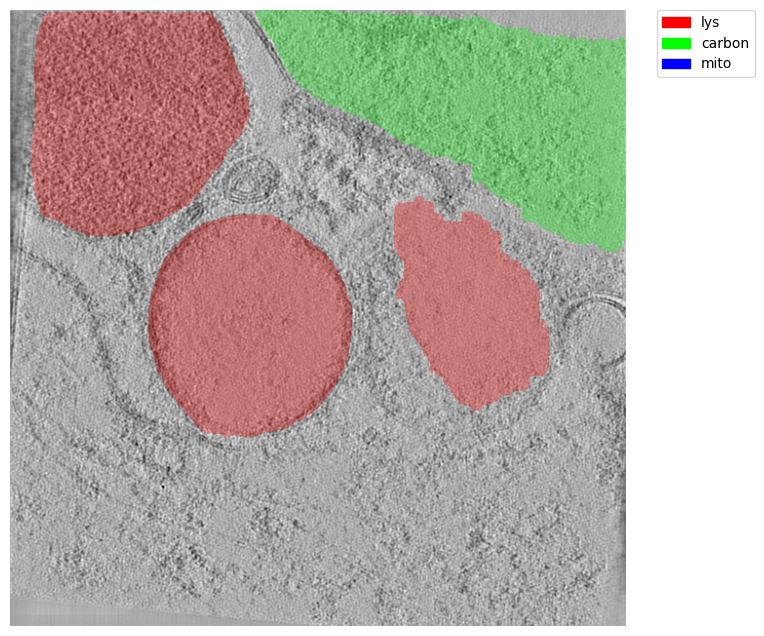

In [107]:
im = zroot['Position_11_Vol']['image']
masks = zroot['Position_11_Vol']['masks']

plt.figure(figsize=(8,8))
plt.imshow(im, cmap='gray'); plt.axis('off')

# Overlay each mask with its corresponding unique color
for i in range(masks.shape[0]):
    mask = masks[i, :, :]
    if mask.max() > 0:  # Check if the mask is not empty
        print(f"Displaying mask {i} for class: {class_names[i]}")
        
        # Create a custom colormap for this mask
        custom_cmap = ListedColormap([
            (1, 1, 1, 0),  # Transparent white for 0 values
            class_colors[class_names[i]],  # Assigned color for non-zero values
        ])

        # Overlay the mask with the specific color
        plt.imshow(mask, cmap=custom_cmap, alpha=0.6)

# Create a legend with class names and their corresponding colors
legend_patches = [
    mpatches.Patch(color=colors[i][:3], label=class_names[i])  # Remove alpha for legend
    for i in range(len(class_names))
]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



#### Move the Best Runs between zarr files

While we can easily overwrite segmentations that were assigned to the wrong class with the SegmentationViewer, replacing the good runIDs requires scripting.

In [ ]:
# Read the Source and Target zarr files
directory_path = '/Users/jonathan.schwartz/Documents/lysosomes/build_sam2_training_data'
source_zfile = os.path.join(directory_path, '24jul29c_ds_v0.zarr')
target_zfile = os.path.join(directory_path, '24jul29c_ds.zarr')

source_zroot = zarr.open(source_zfile, mode='r')
target_zroot = zarr.open(target_zfile, mode='a')

# Copy the good runIDs from the source to the target
target_zroot.attrs['good_run_ids'] = source_zroot.attrs['good_run_ids']


In [4]:
print(target_zroot.attrs['good_run_ids'])

['Position_12_3_Vol', 'Position_12_Vol', 'Position_13_Vol', 'Position_14_Vol', 'Position_22_Vol', 'Position_26_5_Vol', 'Position_30_4_Vol', 'Position_45_Vol', 'Position_53_Vol', 'Position_54_5_Vol', 'Position_54_Vol', 'Position_55_4_Vol', 'Position_56_5_Vol']
